In [1]:
import numpy as np
import pandas as pd

# for basic analysis
import scipy

# data Visualization tools
import matplotlib as mlt
from matplotlib import pyplot as plt
import seaborn as sns


sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('melb_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [3]:
df.sample(10)

Suburb               Address  Rooms Type      Price Method  \
4355    North Melbourne     4/175 Chetwynd St      2    u   720000.0      S   
6347             Toorak        16 Tashinny Rd      3    h  1689000.0      S   
8746           Brighton           160 Were St      5    h  3250000.0     SP   
6925            Fawkner          30 Tucker St      4    h   771000.0      S   
4647        Pascoe Vale  12 Northumberland Rd      3    h   815000.0      S   
4542     Oakleigh South     2/232 Warrigal Rd      3    t   680000.0      S   
10343  Hoppers Crossing     138 Bellbridge Dr      3    h   520000.0     SP   
12822      Princes Hill     112 McIlwraith St      2    h  1625000.0     PI   
3907        Maribyrnong           6 Kynoch La      3    t   560000.0     VB   
4909            Preston           28 Tynan St      3    h  1000000.0      S   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
4355            W.B.  10/12/2016       2.3    3051.0  ...       2.0  1.0   
6347             Kay   4/03/2017       4.6    3142.0  ...       1.0  0.0   
8746          Hodges   1/07/2017      10.5    3186.0  ...       3.0  2.0   
6925   hockingstuart  19/11/2016      12.4    3060.0  ...       2.0  2.0   
4647          Nelson  15/10/2016       9.9    3044.0  ...       1.0  2.0   
4542       Fletchers   3/09/2016      14.7    3167.0  ...       2.0  1.0   
10343          Barry  27/05/2017      18.4    3029.0  ...       2.0  2.0   
12822        Collins  16/09/2017       3.5    3054.0  ...       1.0  1.0   
3907          Biggin   4/02/2016       8.7    3032.0  ...       2.0  2.0   
4909          Nelson   8/10/2016       8.8    3072.0  ...       1.0  2.0   

       Landsize  BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
4355        0.0          98.0     1998.0    Melbourne -37.80150   144.95260   
6347      222.0         118.0     1920.0  Stonnington -37.84480   145.00550   
8746      835.0           NaN        NaN      Bayside -37.92615   145.00282   
6925      647.0           NaN        NaN     Moreland -37.70890   144.96950   
4647      628.0           NaN        NaN     Moreland -37.72950   144.93160   
4542      189.0         123.0        NaN       Monash -37.91220   145.08530   
10343     530.0         169.0     1999.0      Wyndham -37.86713   144.71086   
12822     253.0           NaN        NaN          NaN -37.78243   144.96871   
3907       77.0         115.0     2004.0  Maribyrnong -37.77460   144.87980   
4909      463.0           NaN        NaN      Darebin -37.73390   144.98970   

                       Regionname Propertycount  
4355        Northern Metropolitan        6821.0  
6347        Southern Metropolitan        7217.0  
8746        Southern Metropolitan       10579.0  
6925        Northern Metropolitan        5070.0  
4647        Northern Metropolitan        7485.0  
4542   South-Eastern Metropolitan        3692.0  
10343        Western Metropolitan       13830.0  
12822       Northern Metropolitan        1008.0  
3907         Western Metropolitan        4918.0  
4909        Northern Metropolitan       14577.0  

[10 rows x 21 columns]

In [4]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

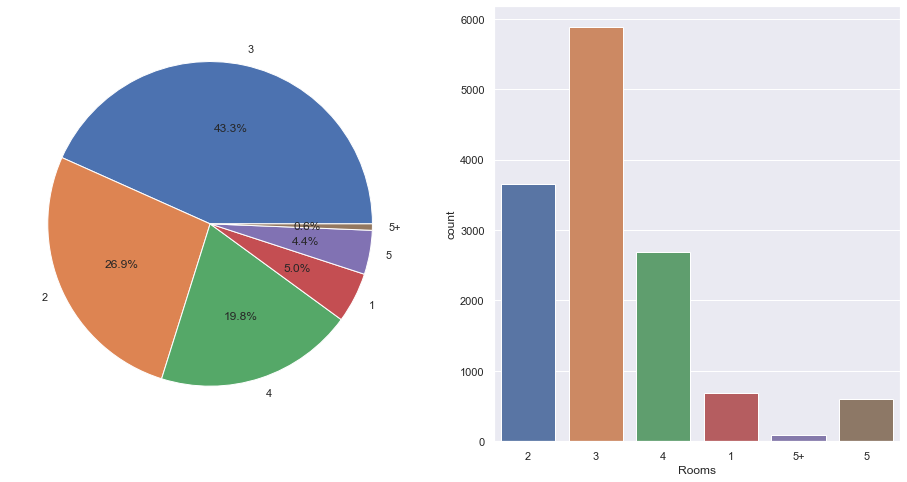

In [5]:
# Let us categorize with respect to number of rooms
fig_num_rooms, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))

by_room_number = df['Rooms'].copy()

## All the houses with rooms more than 5 will me categorized into 5+
by_room_number[by_room_number>5] = '5+'
rooms_count = by_room_number.value_counts()

## Data prep for countplot
data_count = df['Rooms'].copy()
data_count[data_count>5] = '5+'

df_count = pd.DataFrame(data_count.value_counts())
df_count.index.names=['count']
ax1.pie(x=df_count['Rooms'].values,labels=df_count.index.values,autopct='%1.1f%%',)
sns.countplot(x=data_count,ax=ax2)
plt.show()

<ipython-input-6-016fa4d0e8f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_room_change['Rooms'][df_room_change['Rooms'] > 5] = "5+"


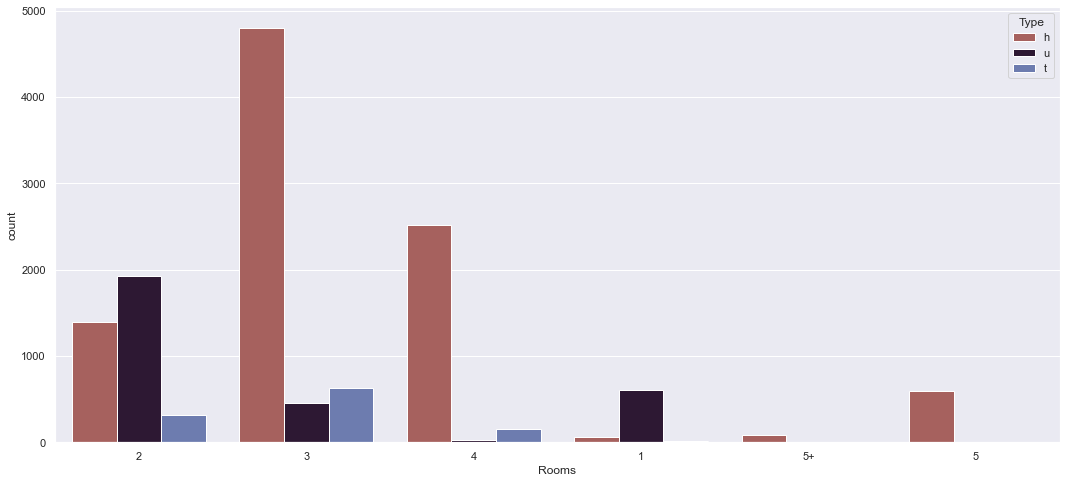

In [6]:
## Let us categorize the number of rooms with respect ot types
df_room_change = df.copy()
df_room_change['Rooms'][df_room_change['Rooms'] > 5] = "5+"
plt.figure(figsize=(18,8))
sns.countplot(data=df_room_change,x='Rooms',hue='Type',palette='twilight_r')
plt.show()

## Let us look at the Retail sellers in Melbourne 

In [7]:
df_room_change['SellerG'].nunique()

268

<h4>There are total '<b><i>268</i></b>' Sellers in this dataset</h4>
      <p>Let us select the top 10 Sellers in this dataset and the rest will be tagged as others</p>

In [8]:
top_10_sellers = df_room_change['SellerG'].value_counts().index.values[:10]
pd.DataFrame(df_room_change['SellerG'].value_counts()[:10])

SellerG
Nelson            1565
Jellis            1316
hockingstuart     1167
Barry             1011
Ray                701
Marshall           659
Buxton             632
Biggin             393
Brad               342
Fletchers          301

In [9]:
## Top 10 sellers in Melbourne
def check_seller(name):
    if name not in top_10_sellers:
        return False
    else:
        return True
df_sellers_data = df_room_change.copy()

In [10]:
df_sellers_data['SellerG'][~df_sellers_data['SellerG'].apply(check_seller)] = "Other"

<ipython-input-10-d61de001c2f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sellers_data['SellerG'][~df_sellers_data['SellerG'].apply(check_seller)] = "Other"


In [11]:
 df_top_10_sellers = df_sellers_data[df_sellers_data['SellerG']!="Other"]

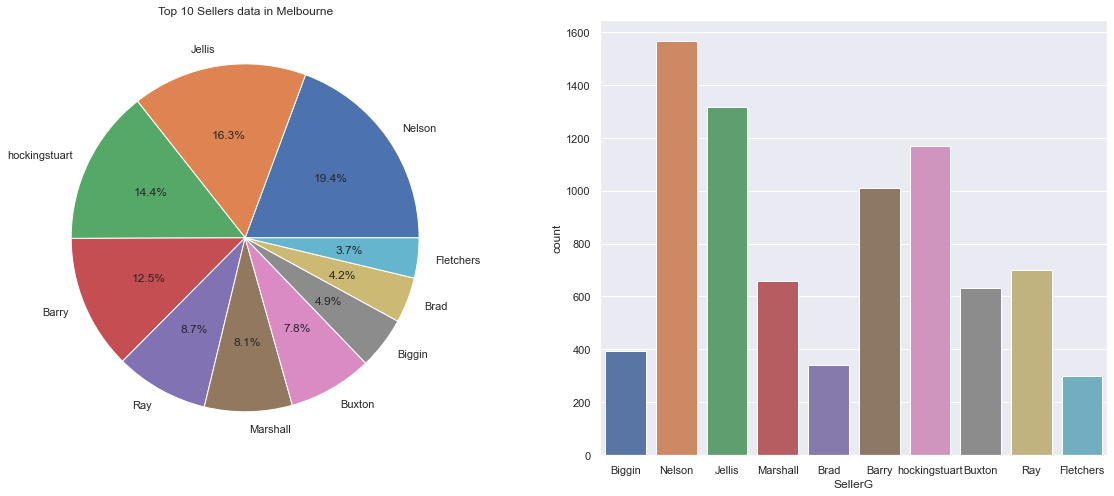

In [12]:
## Plot for the top 10 sellers in melbourne
fig_seller , (ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
seller_labels = df_top_10_sellers['SellerG'].value_counts().index.values
ax1.pie(x=df_top_10_sellers['SellerG'].value_counts(),labels=seller_labels,autopct="%1.1f%%")
ax1.set_title("Top 10 Sellers data in Melbourne")
sns.countplot(data=df_top_10_sellers,x='SellerG',ax=ax2)
plt.show()

### We can also find out the Sellers with respect to the Regions they work in

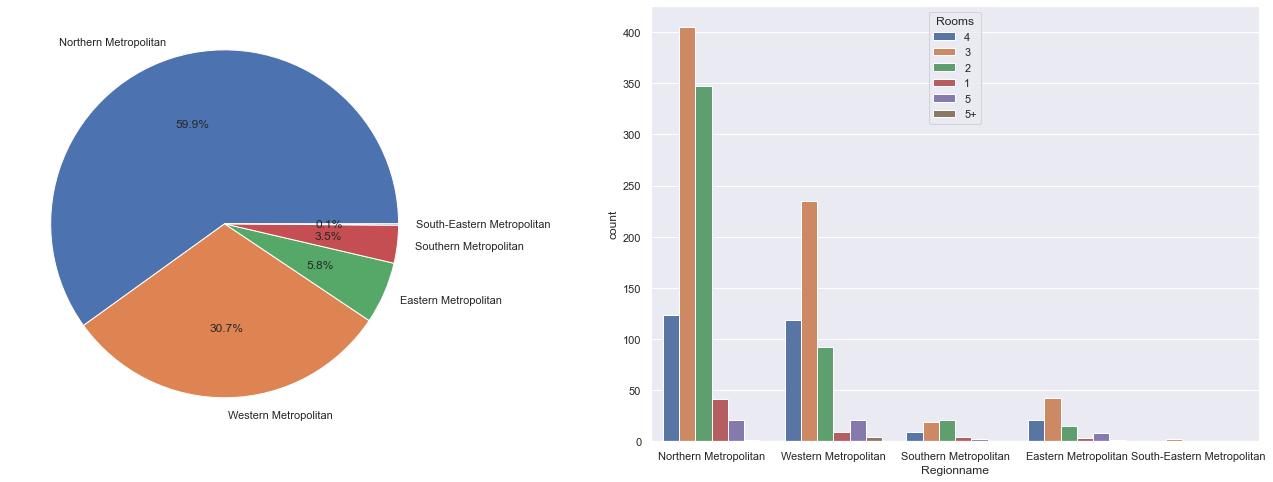

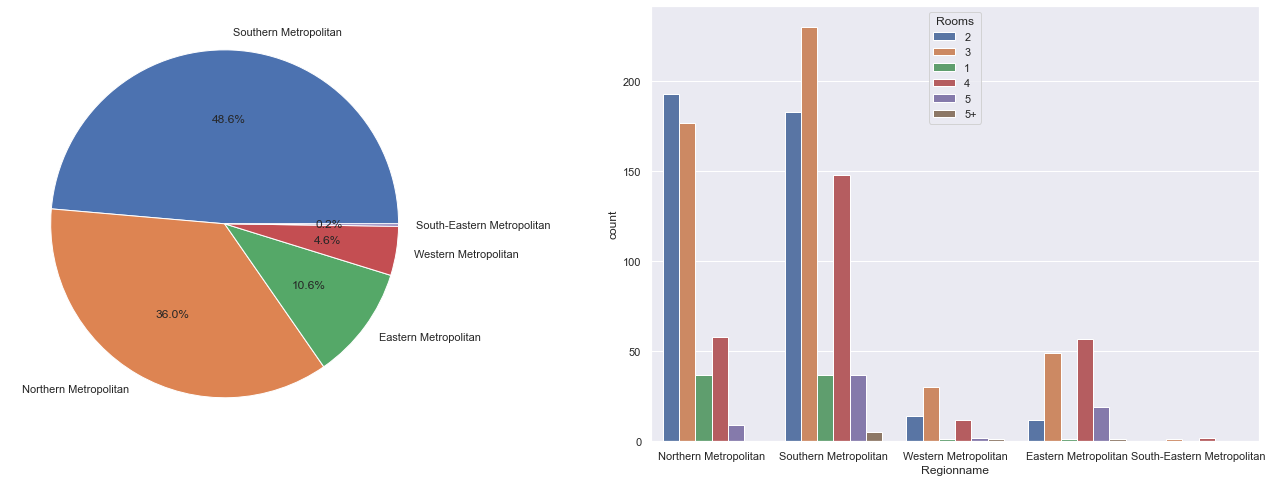

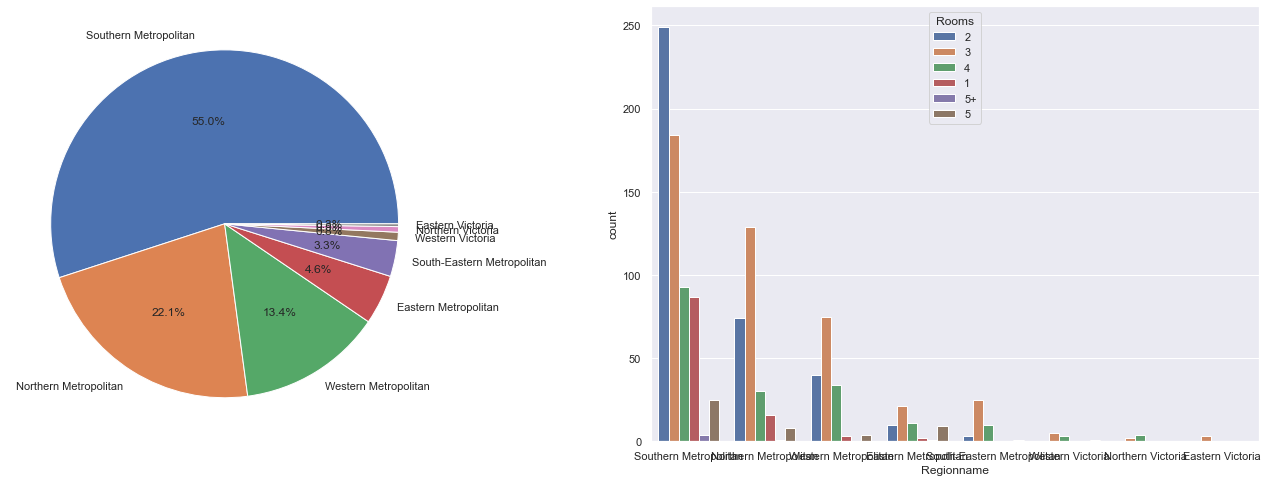

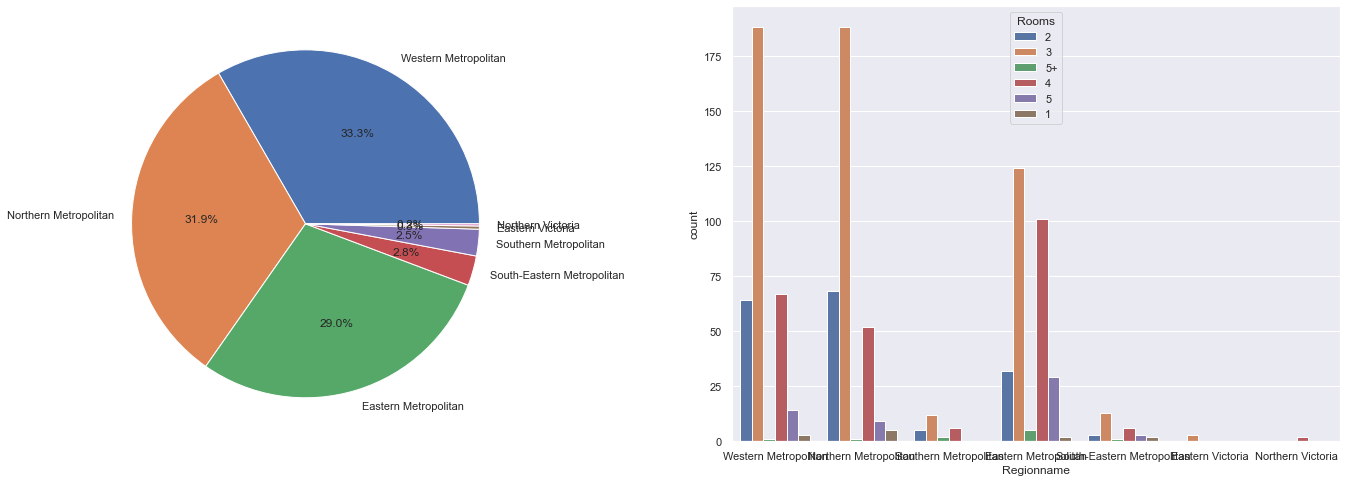

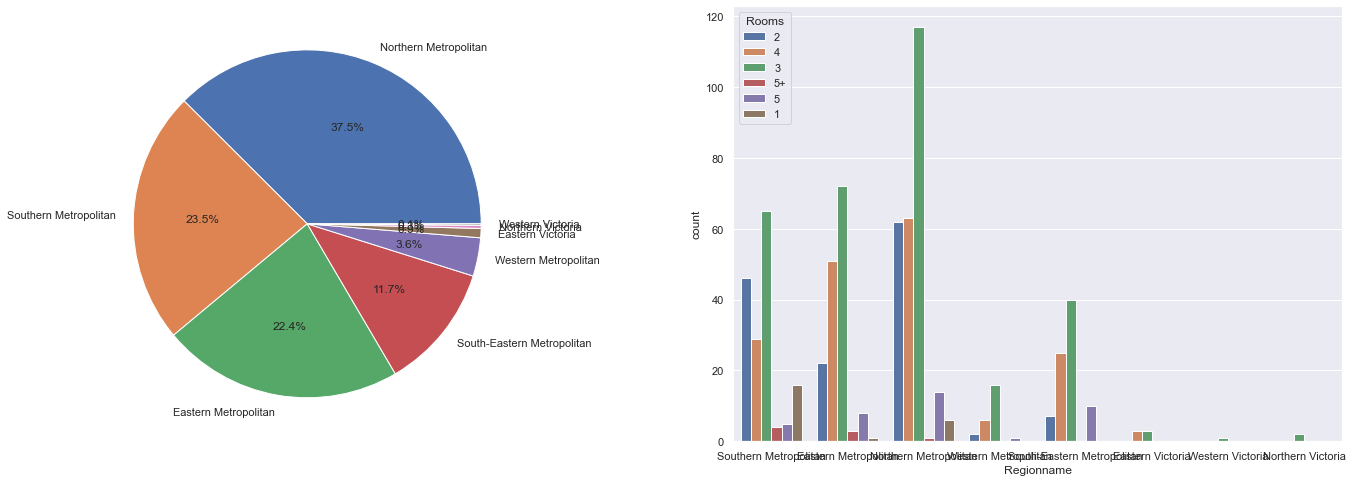

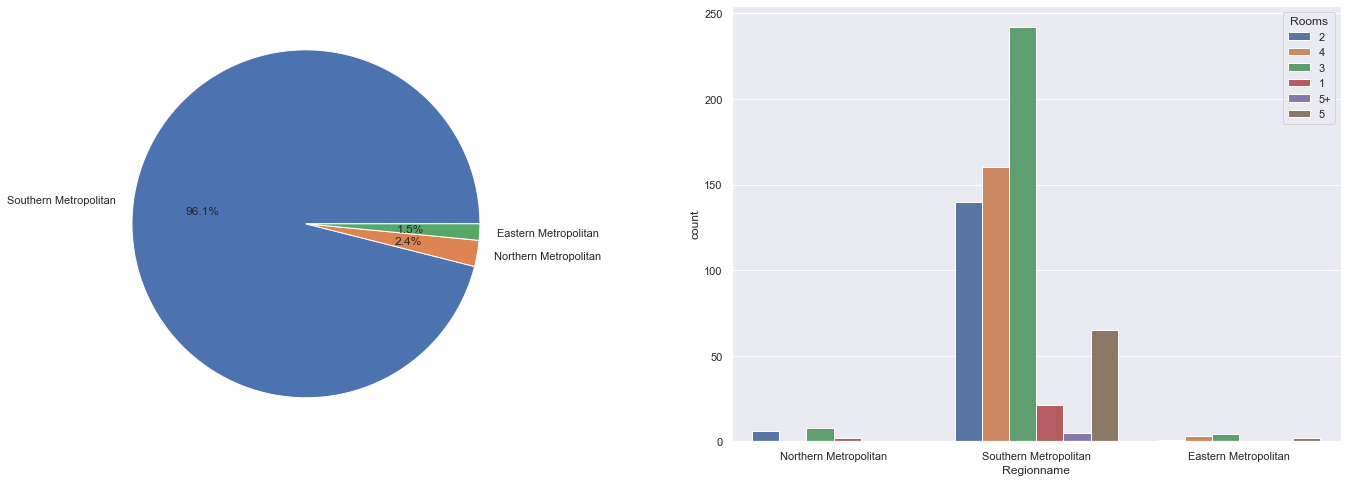

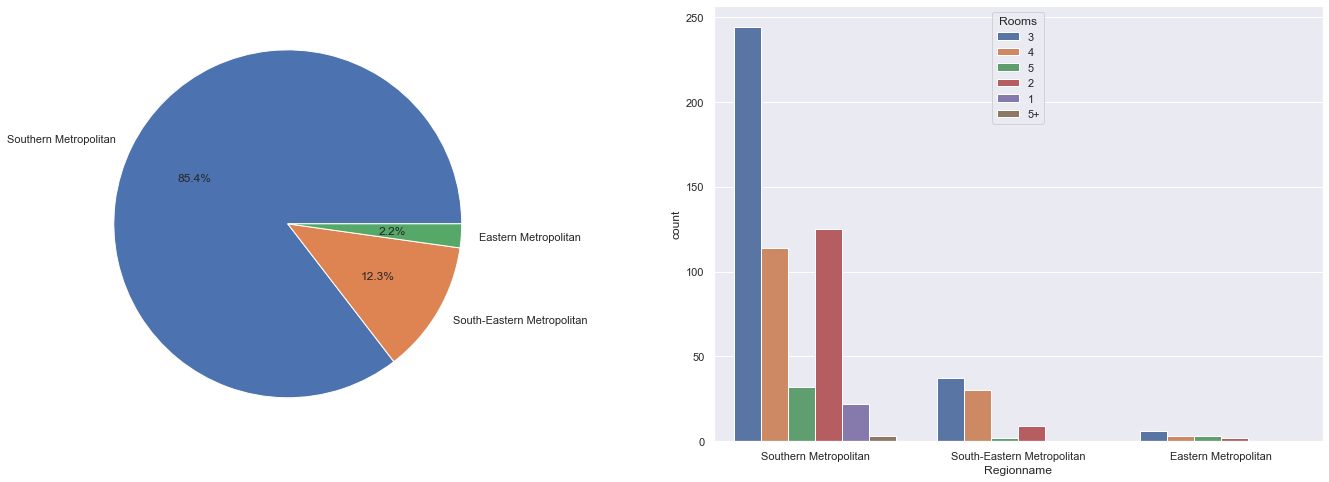

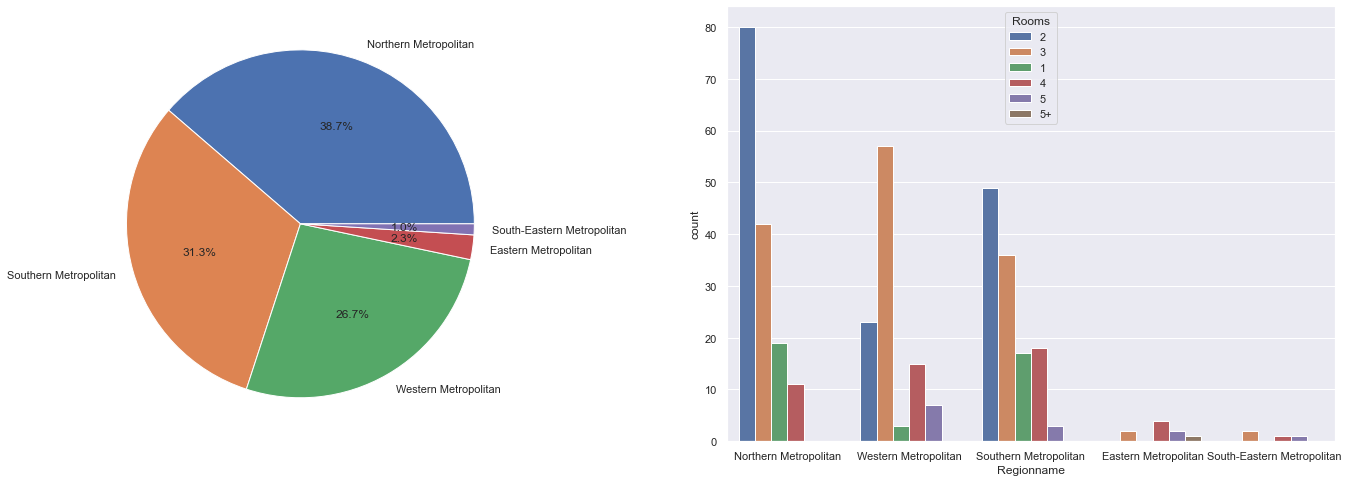

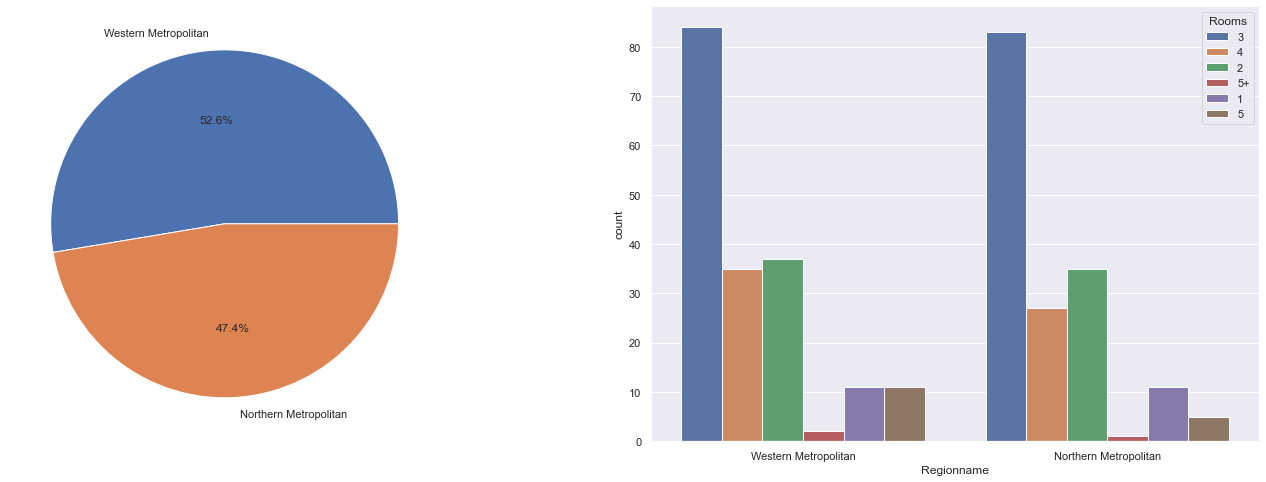

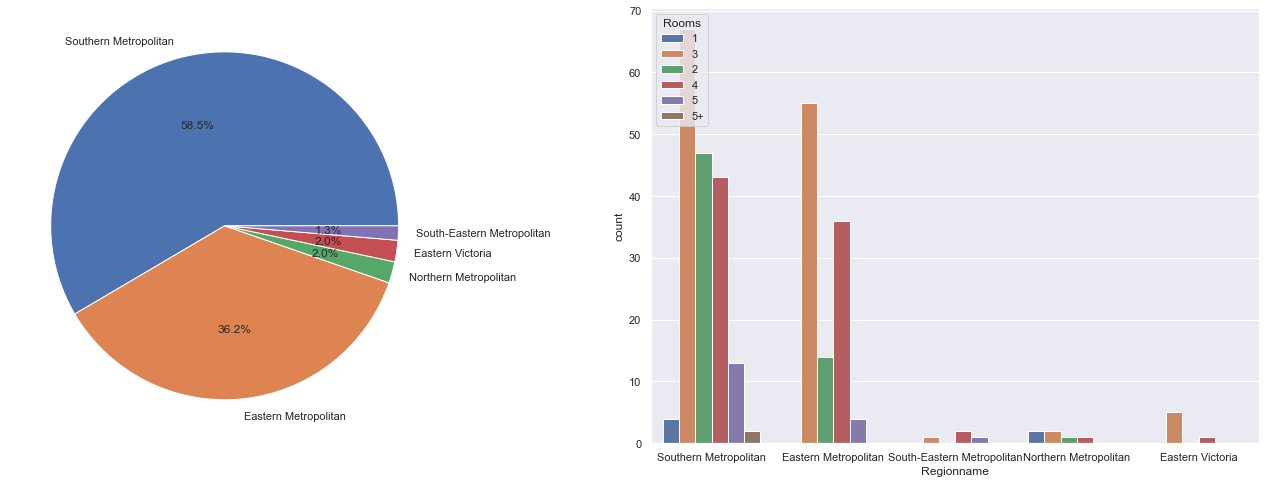

In [13]:
for seller in top_10_sellers:
    dummy_data = df_top_10_sellers[df_top_10_sellers['SellerG'] == seller]
    fig_seller, (ax1,ax2) = plt.subplots(1,2,figsize=(24,8))
    region_labels = dummy_data['Regionname'].value_counts().index.values
    ax1.pie(x=dummy_data['Regionname'].value_counts().values,labels=region_labels,autopct="%1.1f%%")
    sns.countplot(data=dummy_data,x="Regionname",hue='Rooms')
    plt.show()

## Let us look at the price and Rooms distribution on a regional Basis

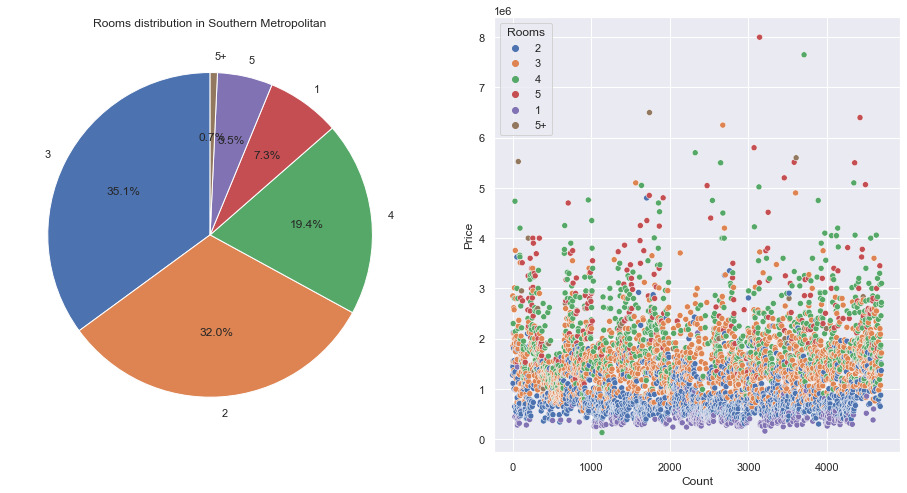

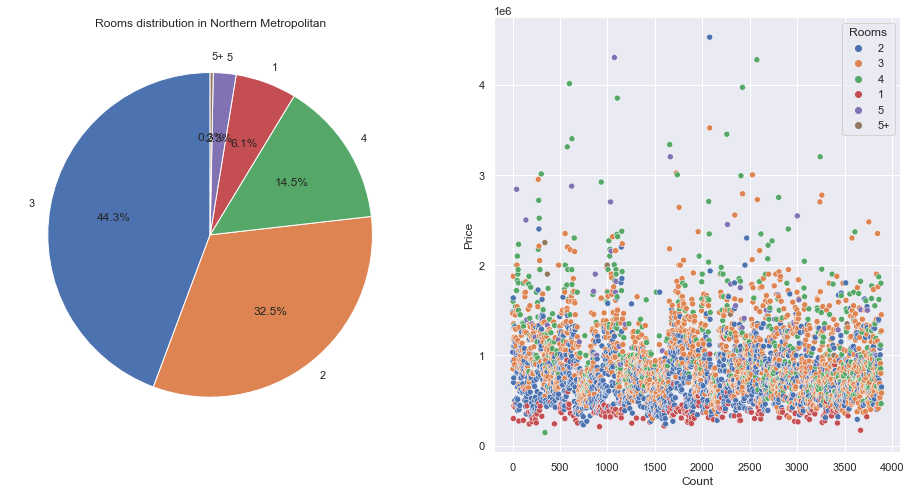

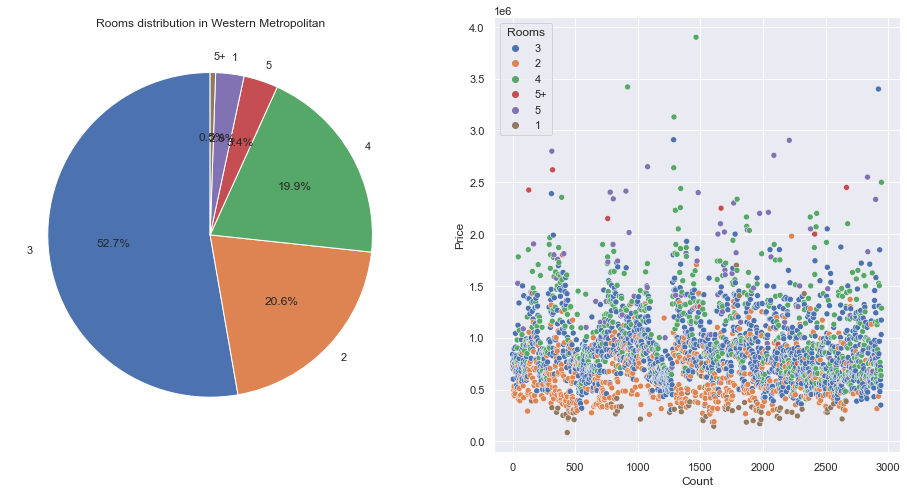

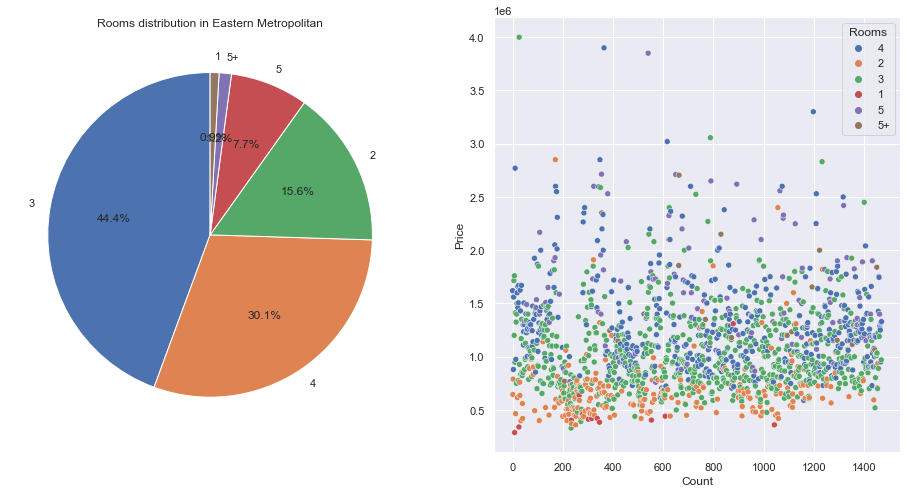

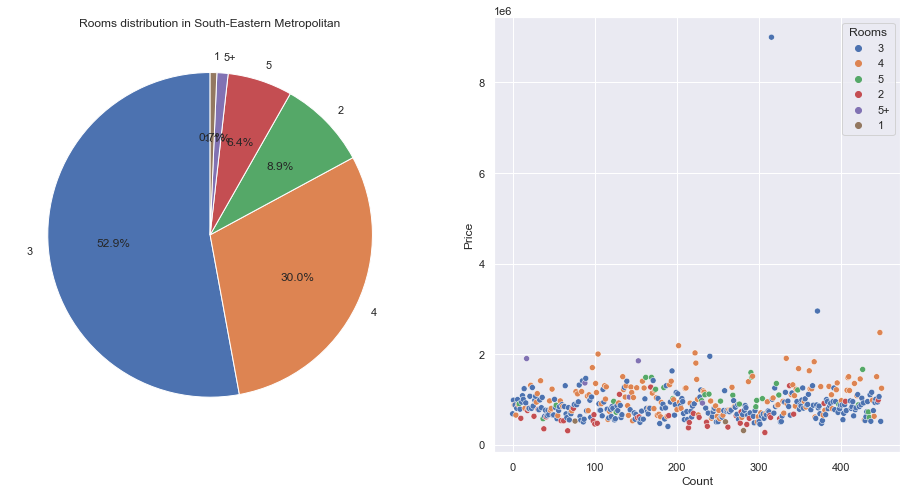

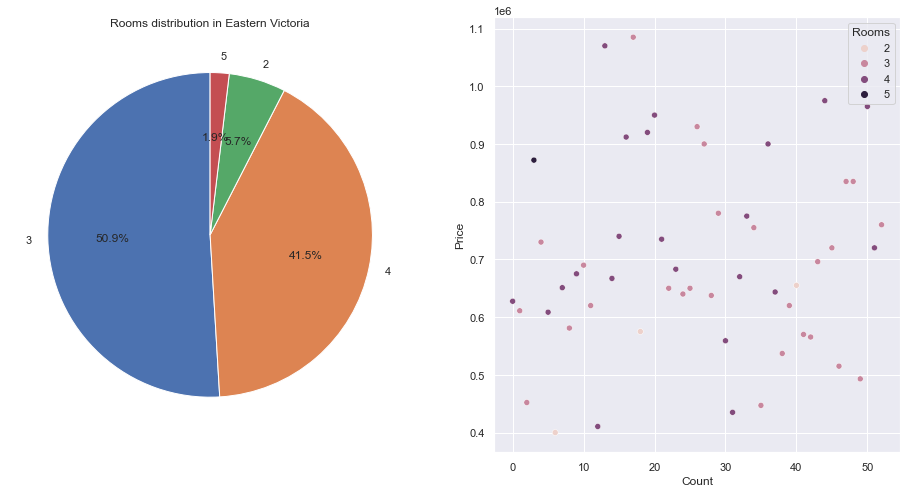

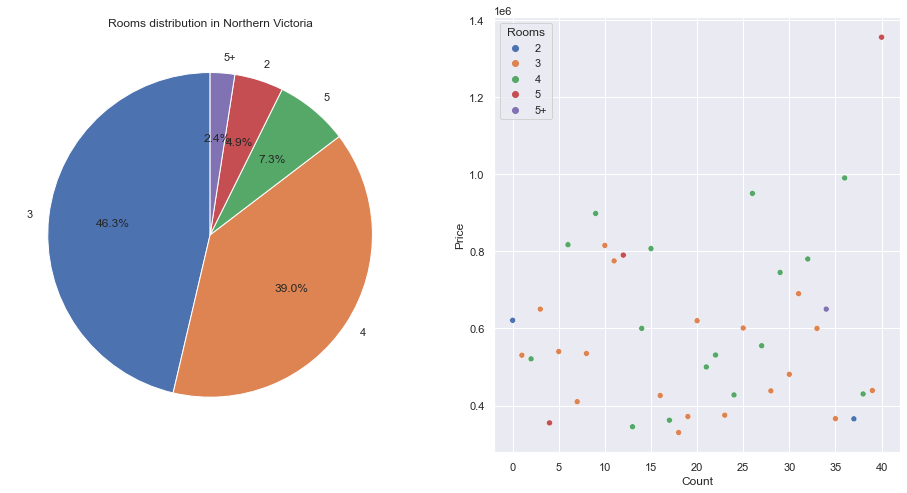

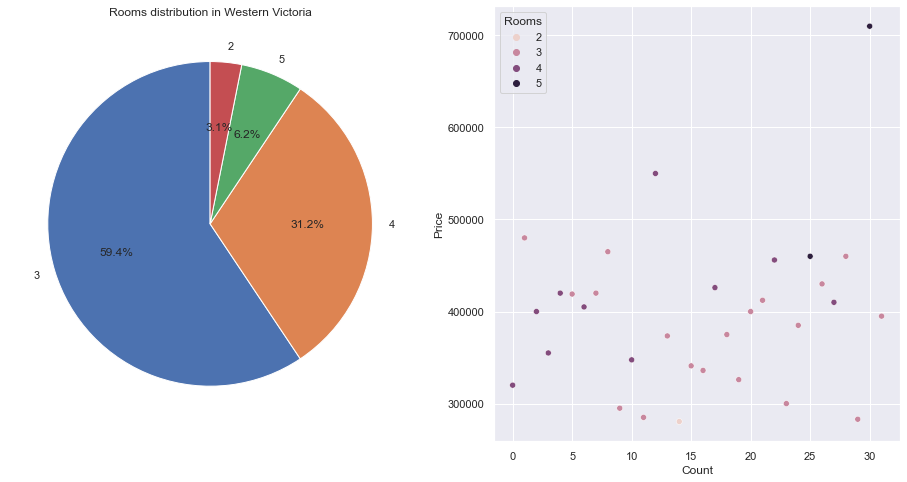

In [14]:
region_names = df_room_change['Regionname'].value_counts().index.values
for region in region_names:
    region_df = df_room_change[df_room_change["Regionname"]==region].copy()
    region_df['count_index'] = range(len(region_df))
    fig_regional_dist, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
    rooms_for_region_label = region_df['Rooms'].value_counts().index.values
    rooms_for_region_values = region_df['Rooms'].value_counts().values
    ax1.pie(x=rooms_for_region_values,labels=rooms_for_region_label,autopct="%1.1f%%",startangle=90)
    ax1.set_title(f"Rooms distribution in {region}")
    sns.scatterplot(data=region_df,x='count_index',y='Price',hue='Rooms')
    ax2.set_xlabel('Count')
    plt.show()

## Let us see correlation  between all the columns

<AxesSubplot:>

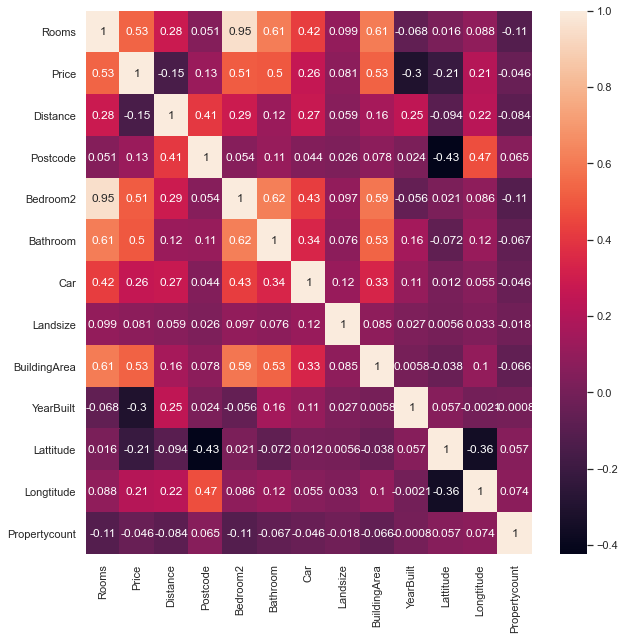

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.dropna().corr(),annot=True)

## If Price was the main Criteria then according to the Heatmap Price is best influenced by 
<ol type='1'>
        <li>Rooms</li>
        <li>Building Area</li>
        <li>Beedroom2</li>
      </ol>

In [16]:
df_date_data = df_room_change.copy()

In [17]:
sr=pd.to_datetime(df_date_data['Date'])
df_date_data['Month'] = sr.dt.month_name(locale = 'English')
df_date_data['Year'] = pd.DatetimeIndex(df_date_data['Date']).year

In [18]:
df_date_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  object 
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

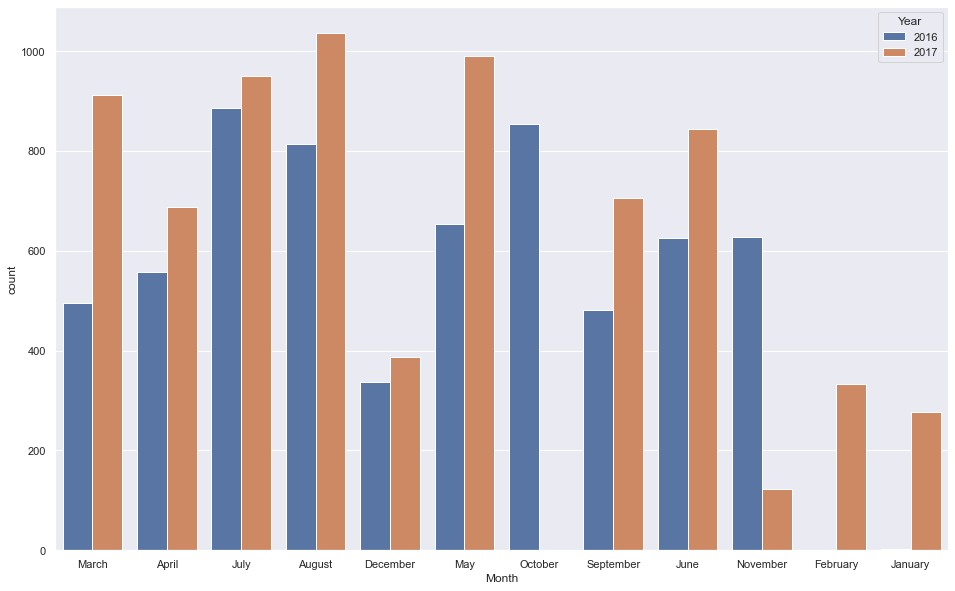

In [19]:
plt.figure(figsize=(16,10))
sns.countplot(data=df_date_data,x='Month',hue='Year')

plt.show()

<AxesSubplot:xlabel='Regionname', ylabel='Price'>

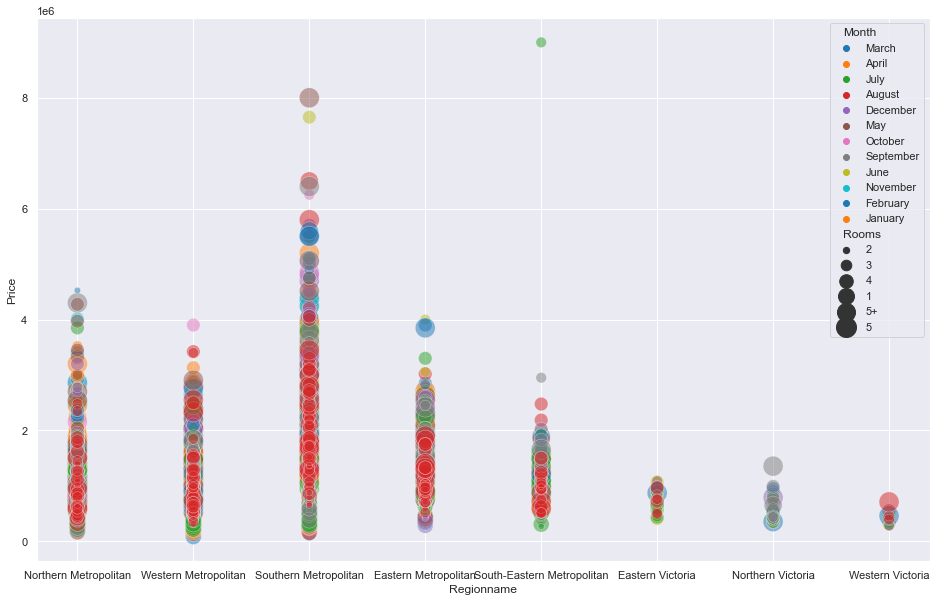

In [20]:
## Classification with respect to monthly prices with respect to region and room size
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_date_data,x='Regionname',y='Price',hue="Month",size="Rooms", sizes=(400, 40),alpha=0.5,palette='tab10')

In [24]:
import plotly.express as px
geo_location = df[['Lattitude', 'Longtitude', 'Regionname', 'SellerG','Price']]

px.scatter(geo_location, y='Lattitude', x='Longtitude', color='Regionname', 
           hover_data=['Regionname', 'SellerG','Price'], 
           title='Distribution of real estate by districts of Melbourne',
           color_discrete_sequence=px.colors.sequential.Oryel)